
#"LATTİCE PARAMETER OPTİMİZATİON"
**WITH MULTIPLE REGRESSION**




##Import to Librarys


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#% matplotlib inline


##Download Data (format CSV)

In [2]:
dt = pd.read_csv('/content/dataset_lattice_50.csv')
dt.head()

,target lenght,min diameter,max diameter,factor of safety,max von-mises stress,max displacement,fill with,mass,force
0,4,1.0,2.5,4.9,43.460,0.05141,100,0.17688,5000
1,3,1.0,2.0,28.9,9.531,0.00925,70,0.18900,1000
2,8,3.0,6.0,12.1,17.830,0.00900,100,0.50710,4000
3,2,1.0,2.5,1.4,149.900,0.03464,100,0.24560,5000
4,10,1.0,4.0,1.7,113.600,0.10280,100,0.25260,30000


In [3]:
dt = dt.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
dt.head()

,target lenght,min diameter,max diameter,factor of safety,max von-mises stress,max displacement,fill with,mass,force
0,30,4.0,8.0,1.7,124.6,0.05750,100,0.7480,68000
1,15,1.8,4.0,1.4,157.2,0.07680,100,0.4348,41000
2,7,0.7,2.3,5.0,42.8,0.01980,100,0.4138,6480
3,26,2.0,4.0,1.8,121.0,0.04987,100,0.4000,26000
4,12,0.8,2.0,2.0,138.9,0.13810,100,0.1985,10000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target lenght         50 non-null     int64  
 1   min diameter          50 non-null     float64
 2   max diameter          50 non-null     float64
 3   factor of safety      50 non-null     float64
 4   max von-mises stress  50 non-null     float64
 5   max displacement      50 non-null     float64
 6   fill with             50 non-null     int64  
 7   mass                  50 non-null     float64
 8   force                 50 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 3.6 KB


## Checking the Number of Null Values in the Dataset

In [6]:
dt.isnull().sum()

target lenght           0
min diameter            0
max diameter            0
factor of safety        0
max von-mises stress    0
max displacement        0
fill with               0
mass                    0
force                   0
dtype: int64

In [7]:
dt.describe()

,target lenght,min diameter,max diameter,factor of safety,max von-mises stress,max displacement,fill with,mass,force
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,13.280000,1.605000,4.200000,4.765600,140.660534,0.069369,96.800000,0.395681,26251.560000
std,9.973516,1.004391,2.319923,8.558465,137.259541,0.073397,8.675558,0.212524,24743.842521
min,2.000000,0.300000,1.000000,0.300000,0.022680,0.001537,70.000000,0.120000,1000.000000
25%,6.000000,1.000000,2.500000,1.125000,41.847500,0.022250,100.000000,0.211100,5187.500000
50%,10.000000,1.000000,3.500000,1.900000,112.000000,0.049875,100.000000,0.340877,15000.000000
75%,16.750000,2.300000,6.000000,5.000000,183.250000,0.075750,100.000000,0.522000,44000.000000
max,40.000000,4.000000,9.000000,54.000000,629.000000,0.423400,100.000000,0.995000,80000.000000


##Correlation Diamgram

<Axes: >

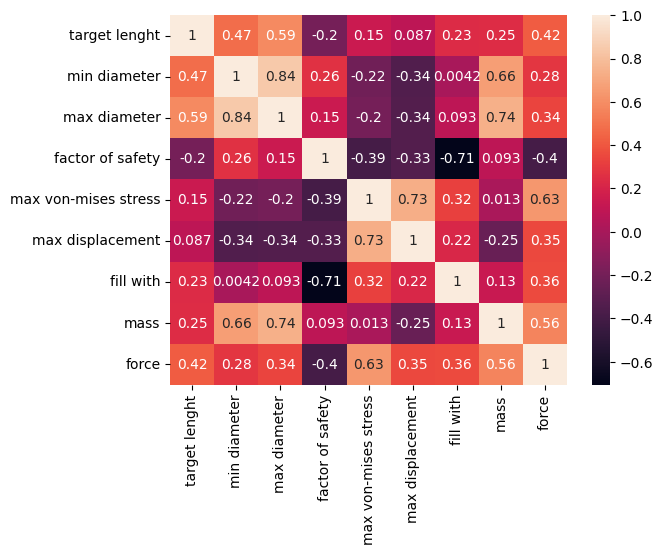

In [8]:
from matplotlib.cm import scale
corr = dt.corr()
sns.heatmap(corr, annot = True)




##Data Visualization





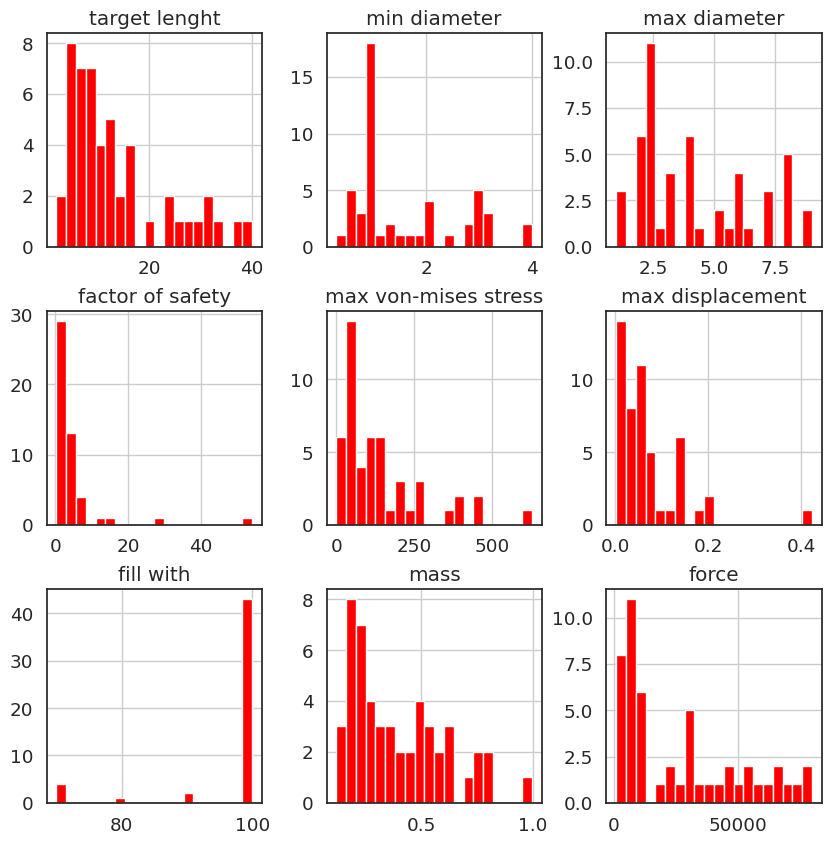

In [9]:
sns.set(style='white',font_scale=1.2, rc={'figure.figsize':(10,10)})
ax=dt.hist(bins=20,color='red' )

#Correlations Scatter Plot 

In [10]:
#sns.pairplot(dt, height=3)

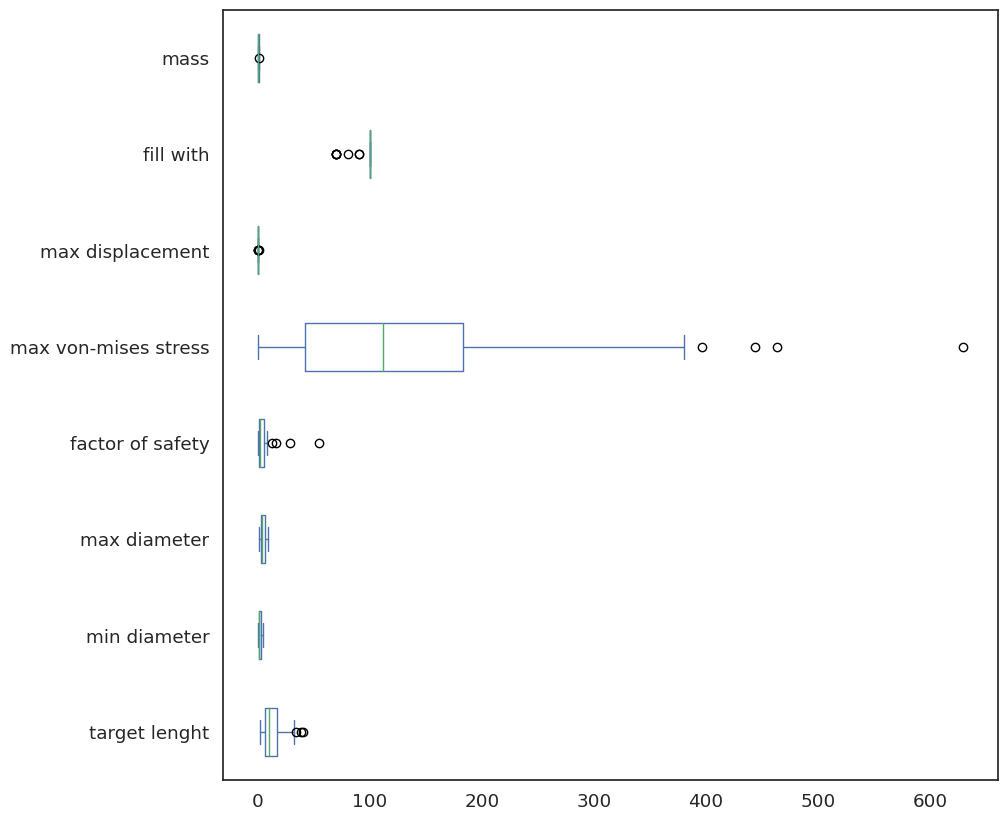

In [11]:
dt2=dt.drop('force',axis=1)
dt2.plot(kind='box', vert=False, figsize=(10, 10))
plt.show()


In [12]:
#Q1 = dt.quantile(0.25)
#Q3 = dt.quantile(0.75)
#IQR = Q3 - Q1

#alt_sinir = Q1 - 1.5*IQR
#ust_sinir = Q3 + 1.5*IQR

#dt = dt[(dt >= alt_sinir) & (dt <= ust_sinir)]


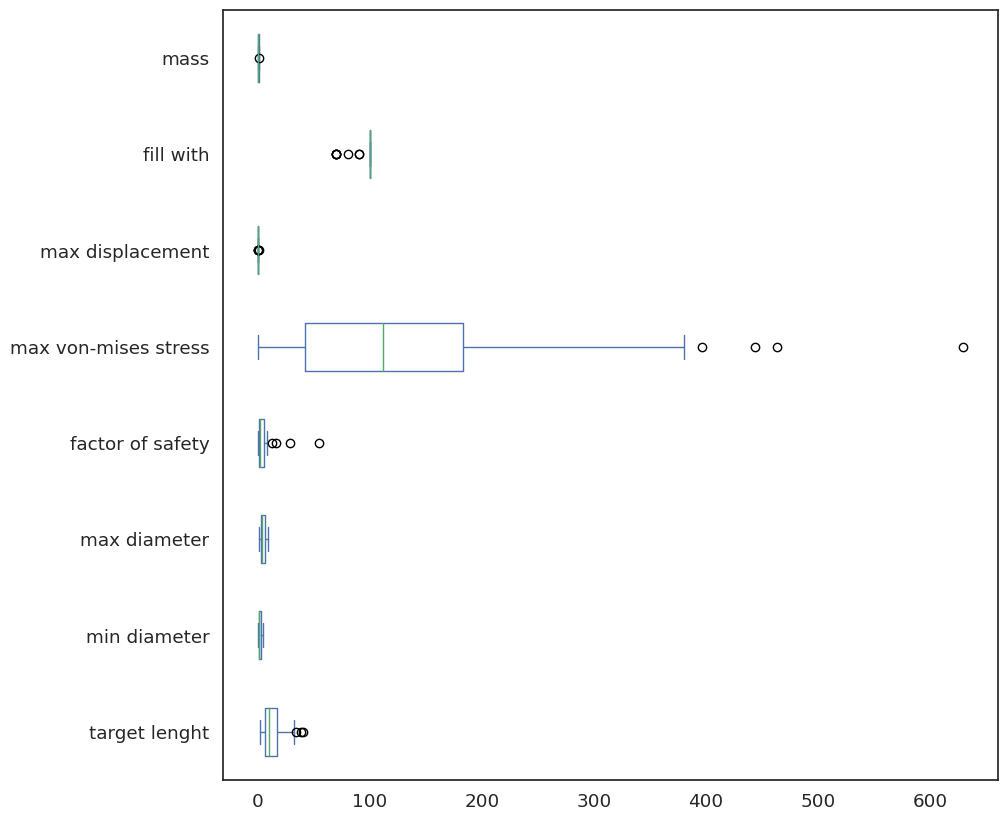

In [13]:
dt2.plot(kind='box', vert=False, figsize=(10, 10))
plt.show()

In [14]:
#dt.isnull().sum()

In [15]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=3)
#dt1= imputer.fit_transform(dt)

In [16]:
#dt = pd.DataFrame(dt1, columns=dt.columns)

# Sample Replication with "Boostrap Method"

In [17]:
#bootstrap_sample = dt.sample(n=1000, replace=True)
#dt = pd.concat([dt, bootstrap_sample])

In [18]:
#dt

##Correlation Diagram After Boostrap

In [19]:
#from matplotlib.cm import scale
#corr = dt.corr()
#sns.heatmap(corr, annot = True)

#Target Feature Separation

In [20]:
X = dt.drop(['target lenght',	'min diameter',	'max diameter'], axis = 1)
y1=dt['target lenght']
y2=dt['min diameter']
y3=dt['max diameter']

In [21]:
X

,factor of safety,max von-mises stress,max displacement,fill with,mass,force
0,1.70,124.60000,0.057500,100,0.748000,68000
1,1.40,157.20000,0.076800,100,0.434800,41000
2,5.00,42.80000,0.019800,100,0.413800,6480
3,1.80,121.00000,0.049870,100,0.400000,26000
4,2.00,138.90000,0.138100,100,0.198500,10000
5,5.60,41.53000,0.048450,100,0.207600,10000
6,0.60,380.10000,0.207900,100,0.206000,30000
7,3.30,65.13000,0.027800,100,0.210000,3333
8,4.60,46.74000,0.018300,100,0.519000,7850
9,0.60,463.70000,0.423400,100,0.149160,30000


# Feature Shape Control

In [22]:
y1.shape,X.shape

((50,), (50, 6))

In [23]:
y2.shape,X.shape

((50,), (50, 6))

In [24]:
y3.shape,X.shape

((50,), (50, 6))

#Feature Visualization 

First 5 lines for feature 'Stress' and 'max diameter' 

In [25]:
X.head()

,factor of safety,max von-mises stress,max displacement,fill with,mass,force
0,1.7,124.6,0.05750,100,0.7480,68000
1,1.4,157.2,0.07680,100,0.4348,41000
2,5.0,42.8,0.01980,100,0.4138,6480
3,1.8,121.0,0.04987,100,0.4000,26000
4,2.0,138.9,0.13810,100,0.1985,10000


In [26]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Split

Train Test Split for 'Stress'

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42,)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42,)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42,)

In [28]:
X_train, X_val, y1_train, y1_val, y2_train, y2_val, y3_train, y3_val = train_test_split(X_train, y1_train, y2_train, y3_train, test_size=0.2, random_state=42)

In [29]:
# Her bir setin boyutları kontrol edilir
print("Train 1 set boyutu: ", X_train.shape, y1_train.shape)
print("Validation 1 set boyutu: ", X_val.shape, y1_val.shape)
print("Test 1 set boyutu: ", X_test.shape, y1_test.shape)

print("Train 2 set boyutu: ", X_train.shape, y2_train.shape)
print("Validation 2 set boyutu: ", X_val.shape, y2_val.shape)
print("Test 2 set boyutu: ", X_test.shape, y2_test.shape)

print("Train 3 set boyutu: ", X_train.shape, y3_train.shape)
print("Validation 3 set boyutu: ", X_val.shape, y3_val.shape)
print("Test 3 set boyutu: ", X_test.shape, y3_test.shape)

Train 1 set boyutu:  (32, 6) (32,)
Validation 1 set boyutu:  (8, 6) (8,)
Test 1 set boyutu:  (10, 6) (10,)
Train 2 set boyutu:  (32, 6) (32,)
Validation 2 set boyutu:  (8, 6) (8,)
Test 2 set boyutu:  (10, 6) (10,)
Train 3 set boyutu:  (32, 6) (32,)
Validation 3 set boyutu:  (8, 6) (8,)
Test 3 set boyutu:  (10, 6) (10,)


#Normalization Scaler

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train.shape

(32, 6)

##Multioutput Regressor for Using Boostrap and RandomForest

In [32]:
model = RandomForestRegressor(n_estimators = 400, random_state =0)

# BaggingRegressor kullanarak MultiOutputRegressor modeli tanımlama
bagging_model = BaggingRegressor(base_estimator=model, n_estimators=10, random_state=0)

# MultiOutputRegressor kullanarak bootstrap yöntemini uygulama
bootstrap_model = MultiOutputRegressor(bagging_model)

# Eğitim verilerini kullanarak modeli eğitme
bootstrap_model.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MultiOutputRegressor(estimator=BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=400,
                                                                                     random_state=0),
                                                random_state=0))

##Predictiving to Target Features for RF

In [33]:
y_test_pred = bootstrap_model.predict(X_test)

In [34]:
y_val_pred= bootstrap_model.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


In [35]:
y1_test_pred, y2_test_pred,y3_test_pred = y_test_pred[:, 0], y_test_pred[:, 1],y_test_pred[:,2]

In [36]:
y1_val_pred, y2_val_pred,y3_val_pred = y_val_pred[:, 0], y_val_pred[:, 1],y_val_pred[:,2]

##Mean Square Error (MSE)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
mse_y1_test = mean_squared_error(y1_test,y1_test_pred)
mse_y2_test = mean_squared_error(y2_test, y2_test_pred)
mse_y3_test = mean_squared_error(y3_test, y3_test_pred)

print(f"Y1 için MSE: {mse_y1_test:.2f}")
print(f"Y2 için MSE: {mse_y2_test:.2f}")
print(f"Y3 için MSE: {mse_y3_test:.2f}")

Y1 için MSE: 116.46
Y2 için MSE: 0.80
Y3 için MSE: 2.85


In [39]:
mse_y1_val = mean_squared_error(y1_val,y1_val_pred)
mse_y2_val = mean_squared_error(y2_val, y2_val_pred)
mse_y3_val = mean_squared_error(y3_val, y3_val_pred)
print(f"Y1 için MSE: {mse_y1_val:.2f}")
print(f"Y2 için MSE: {mse_y2_val:.2f}")
print(f"Y3 için MSE: {mse_y3_val:.2f}")

Y1 için MSE: 213.43
Y2 için MSE: 0.87
Y3 için MSE: 2.39


## R-Square Error (R²)

In [40]:
r2_y1 = r2_score(y1_test, y1_test_pred)
r2_y2 = r2_score(y2_test, y2_test_pred)
r2_y3 = r2_score(y3_test, y3_test_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -0.33
Y2 için R-kare: 0.11
Y3 için R-kare: 0.49


In [41]:
r2_y1 = r2_score(y1_val, y1_val_pred)
r2_y2 = r2_score(y2_val, y2_val_pred)
r2_y3 = r2_score(y3_val, y3_val_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -1.85
Y2 için R-kare: 0.21
Y3 için R-kare: 0.20



# MultiOutput Regressor for Using Gradient Boosting Regressor



In [42]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as lr

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
mor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [44]:
#rf = RandomForestRegressor(n_estimators = 400, random_state =0)
#mor = MultiOutputRegressor(rf)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.005,
          'loss': 'absolute_error'}

# Modeli oluşturma
gb_model = GradientBoostingRegressor(**params)



# Modeli eğitme

mor = MultiOutputRegressor(gb_model)
mor.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.005,
                                                         loss='absolute_error',
                                                         max_depth=5,
                                                         min_samples_split=6,
                                                         n_estimators=500))

##Predictiving to Target Features GB

In [46]:
y_test_pred = mor.predict(X_test)

In [47]:
y_val_pred= mor.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [48]:
y1_test_pred, y2_test_pred,y3_test_pred = y_test_pred[:, 0], y_test_pred[:, 1],y_test_pred[:,2]

In [49]:
y1_val_pred, y2_val_pred,y3_val_pred = y_val_pred[:, 0], y_val_pred[:, 1],y_val_pred[:,2]

##Mean Square Error (MSE)

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
mse_y1_test = mean_squared_error(y1_test,y1_test_pred)
mse_y2_test = mean_squared_error(y2_test, y2_test_pred)
mse_y3_test = mean_squared_error(y3_test, y3_test_pred)

print(f"Y1 için MSE: {mse_y1_test:.2f}")
print(f"Y2 için MSE: {mse_y2_test:.2f}")
print(f"Y3 için MSE: {mse_y3_test:.2f}")

Y1 için MSE: 93.66
Y2 için MSE: 0.84
Y3 için MSE: 2.91


In [52]:
mse_y1_val = mean_squared_error(y1_val,y1_val_pred)
mse_y2_val = mean_squared_error(y2_val, y2_val_pred)
mse_y3_val = mean_squared_error(y3_val, y3_val_pred)
print(f"Y1 için MSE: {mse_y1_val:.2f}")
print(f"Y2 için MSE: {mse_y2_val:.2f}")
print(f"Y3 için MSE: {mse_y3_val:.2f}")

Y1 için MSE: 96.92
Y2 için MSE: 1.16
Y3 için MSE: 1.61


## R-Square Error (R²)

In [53]:
r2_y1 = r2_score(y1_test, y1_test_pred)
r2_y2 = r2_score(y2_test, y2_test_pred)
r2_y3 = r2_score(y3_test, y3_test_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -0.07
Y2 için R-kare: 0.05
Y3 için R-kare: 0.48


In [54]:
r2_y1 = r2_score(y1_val, y1_val_pred)
r2_y2 = r2_score(y2_val, y2_val_pred)
r2_y3 = r2_score(y3_val, y3_val_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -0.29
Y2 için R-kare: -0.05
Y3 için R-kare: 0.46


##Improvement with Hyperparameter Tuning

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.009,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model1 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model1.fit(X_train, y1_train)

y1_pred = gb_model1.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y1_test, y1_pred)
r2 = gb_model1.score(X_test, y1_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 134.05
R^2 score: -0.54


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'huber'}

# Modeli oluşturma
gb_model2 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model2.fit(X_train, y2_train)

y2_pred = gb_model2.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y2_test, y2_pred)
r2 = gb_model2.score(X_test, y2_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))


MSE: 0.91
R^2 score: -0.02


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.05,
          'loss': 'absolute_error'}

# Modeli oluşturma
gb_model3 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model3.fit(X_train, y3_train)

y1_pred = gb_model3.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y3_test, y3_test_pred)
r2 = gb_model3.score(X_test, y3_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 2.91
R^2 score: 0.40


##An Example of Using the Model

In [58]:
selected_row = dt.loc[35,:]
print(selected_row)

target lenght              8.0000
min diameter               3.0000
max diameter               6.0000
factor of safety          12.1000
max von-mises stress      17.8300
max displacement           0.0090
fill with                100.0000
mass                       0.5071
force                   4000.0000
Name: 35, dtype: float64


In [66]:
target_lenght =gb_model1.predict(np.array([[12.1,17.83,0.009,100,0.5071,4000]]))
target_lenght

array([31.91252749])

In [60]:
oran=gb_model2.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

ValueError: ignored

In [ ]:
uzunluk=gb_model3.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [ ]:
print(f"Tahmin edilen değerler=\ntarget lenght={cap}\nmax diameter(mm)={uzunluk}\nmin diameter(mm)={oran} \n\nGerçek değerler=\n{dt.iloc[250,7:10]}")